In [1]:
import logging
logging.basicConfig(format='\033[93m%(asctime)s %(levelname)s %(name)s:\033[0m %(message)s', level=logging.INFO, datefmt='%I:%M:%S')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from src.ZigZag.Builder import ZigZagBuilder
import src.ZigZag.Builder as zzc
from src.ZigZag.Constant import VALUE_COL_NAME,FLAG_COL_NAME,DELTA_NEAR_EXT,ANGLE_COL_NAME

In [3]:
np.random.seed(1997)

In [4]:
X = np.cumprod(1 + np.random.randn(300) * 0.01)

In [5]:
x_sr = pd.Series(X)
x_sr

0      1.004446
1      1.004694
2      1.004531
3      1.006831
4      1.019180
         ...   
295    0.984610
296    1.003997
297    1.007873
298    1.015916
299    1.028091
Length: 300, dtype: float64

In [6]:
zzb = ZigZagBuilder(0.03, -0.03)

In [7]:
zzb_df = zzb.build_all(x_sr)
zzb_df

,Flag,Value,Angle,Nearest_Ext,Delta_Near_Ext
0,-1,1.004446,0.00724,1.098566,0.094119
1,0,1.011686,0.00724,1.098566,0.093872
2,0,1.018926,0.00724,1.098566,0.094035
3,0,1.026166,0.00724,1.098566,0.091735
4,0,1.033406,0.00724,1.098566,0.079385
...,...,...,...,...,...
295,0,0.995731,0.00809,1.028091,0.043481
296,0,1.003821,0.00809,1.028091,0.024094
297,0,1.011911,0.00809,1.028091,0.020218
298,0,1.020001,0.00809,1.028091,0.012175


In [8]:
zzb_df[zzb_df[FLAG_COL_NAME]!=0]

,Flag,Value,Angle,Nearest_Ext,Delta_Near_Ext
0,-1,1.004446,0.007240,1.098566,0.094119
13,1,1.098566,-0.016429,1.032850,-0.065716
17,-1,1.032850,0.005315,1.107262,0.074412
31,1,1.107262,-0.009466,1.069397,-0.037865
35,-1,1.069397,0.003823,1.115269,0.045872
47,1,1.115269,-0.005852,1.068454,-0.046815
55,-1,1.068454,0.016037,1.100527,0.032073
57,1,1.100527,-0.004329,1.039926,-0.060601
71,-1,1.039926,0.005343,1.120074,0.080148
86,1,1.120074,-0.002036,1.071209,-0.048865


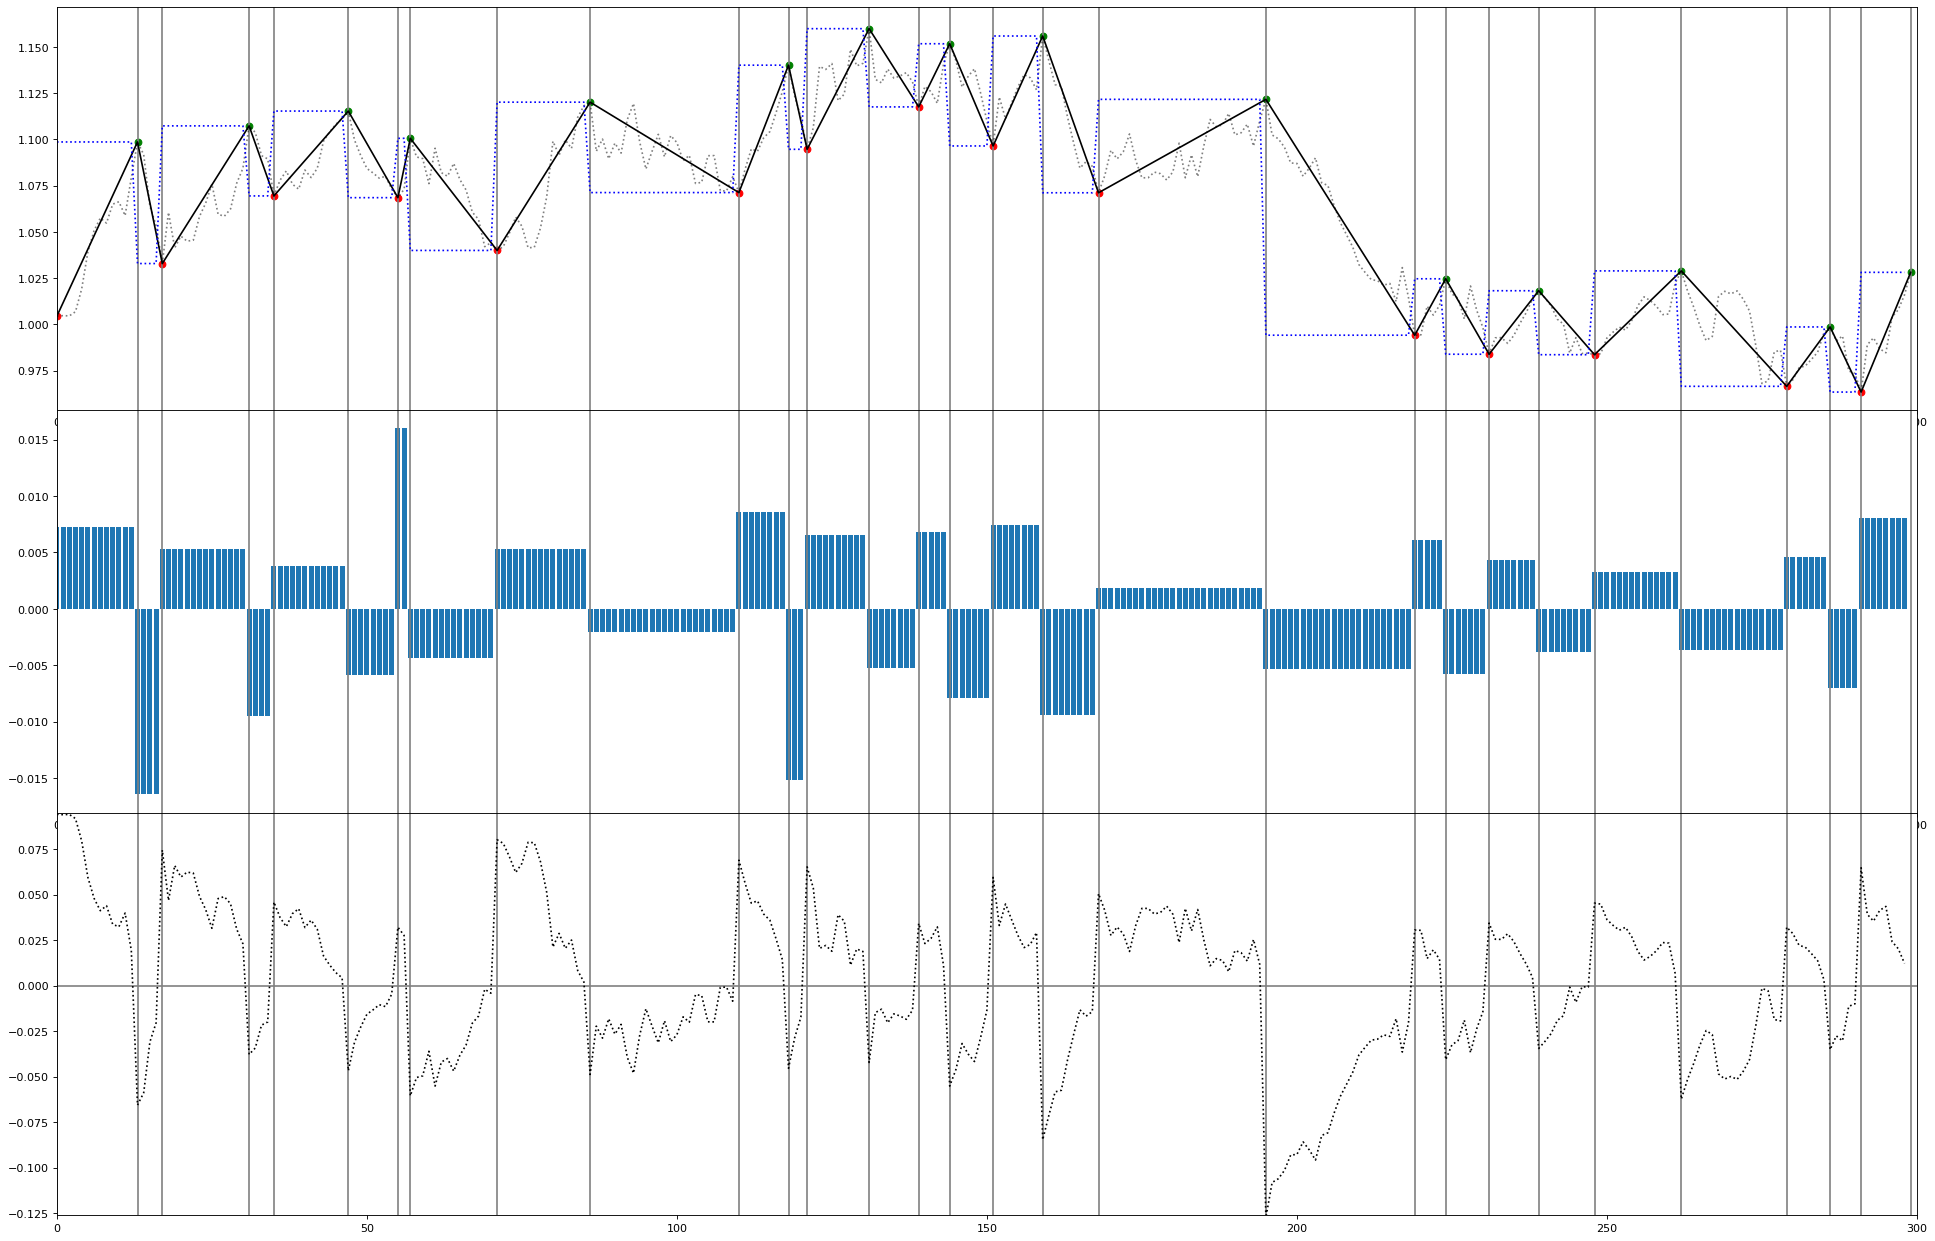

In [9]:
f, axs = plt.subplots(3,1,figsize=(30,20), dpi=80)
plt.subplots_adjust(hspace=0)

axs[0].set_xlim(0, len(X))
axs[0].set_ylim(X.min()*0.99, X.max()*1.01)
axs[0].plot(np.arange(len(X)), X, 'k:', alpha=0.5)
axs[0].plot(np.arange(len(X)), zzb_df[zzc.VALUE_COL_NAME], 'k-')
axs[0].scatter(np.arange(len(X))[zzb_df[zzc.FLAG_COL_NAME] == 1], zzb_df[zzc.VALUE_COL_NAME][zzb_df[zzc.FLAG_COL_NAME] == 1], color='g')
axs[0].scatter(np.arange(len(X))[zzb_df[zzc.FLAG_COL_NAME] == -1], zzb_df[zzc.VALUE_COL_NAME][zzb_df[zzc.FLAG_COL_NAME] == -1], color='r')
axs[0].plot(np.arange(len(X)), zzb_df[zzc.NEAREST_EXT], 'b:')

axs[1].set_xlim(0, len(X))
axs[1].set_ylim(zzb_df[zzc.ANGLE_COL_NAME].min()*1.10, zzb_df[zzc.ANGLE_COL_NAME].max()*1.10)
axs[1].bar(np.arange(len(X)), zzb_df[zzc.ANGLE_COL_NAME])

axs[2].set_xlim(0, len(X))
axs[2].set_ylim(zzb_df[zzc.DELTA_NEAR_EXT].min()*0.99, zzb_df[zzc.DELTA_NEAR_EXT].max()*1.01)
axs[2].plot(np.arange(len(X)), zzb_df[zzc.DELTA_NEAR_EXT], 'k:')
axs[2].hlines(0,xmin=0,xmax=len(X), colors='grey')

for i in range(len(axs)):   
    axs[i].vlines(np.arange(len(X))[zzb_df[zzc.FLAG_COL_NAME] != 0],*axs[i].get_ylim(),"grey")

In [10]:
from src.ZigZag.Vizualize import draw_chart

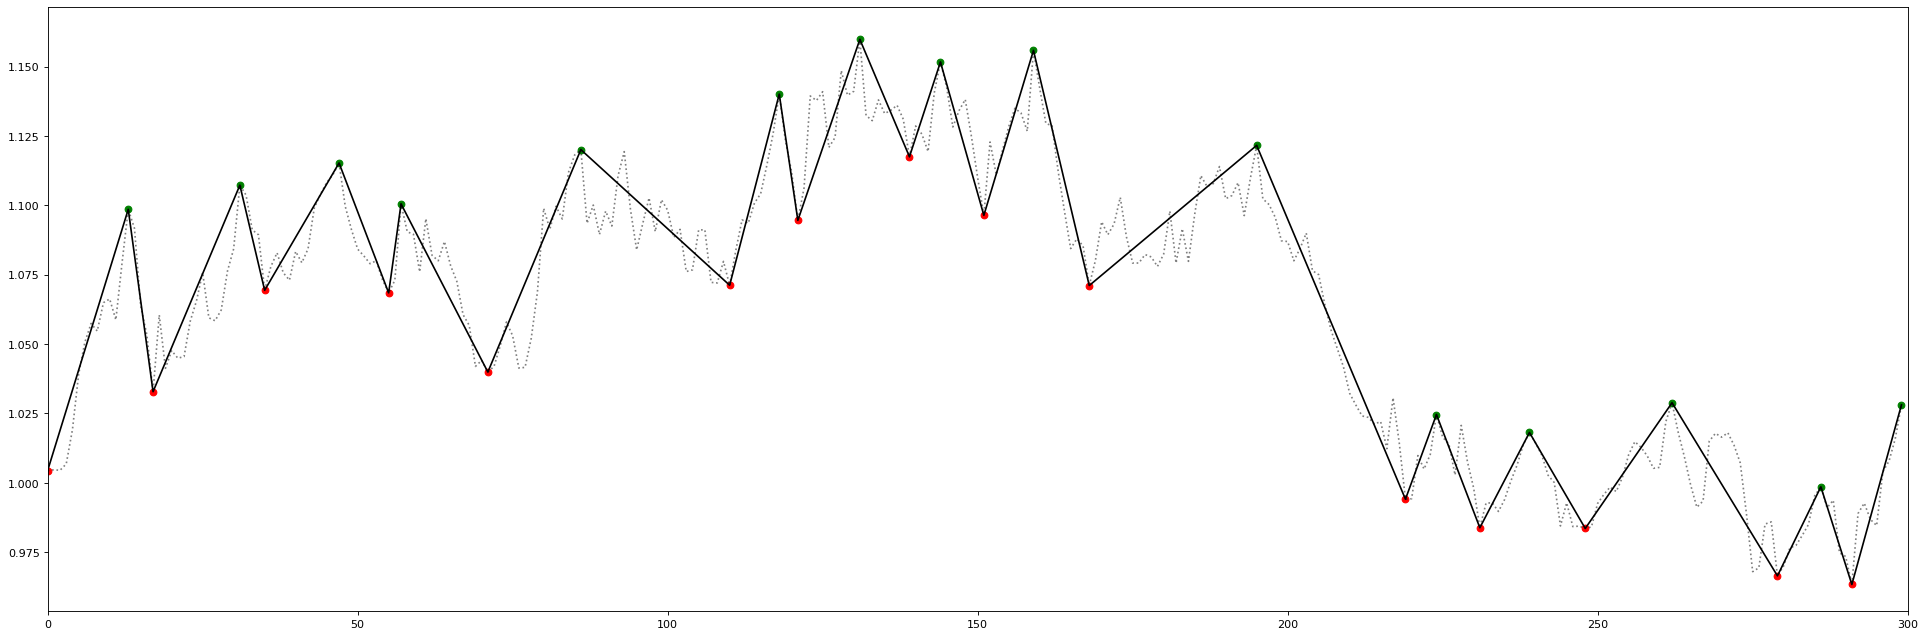

In [11]:
draw_chart(x_sr, zzb_df)

# ProfitCalculator

In [12]:
moves = zzb_df[zzb_df[FLAG_COL_NAME]!=0][[VALUE_COL_NAME,DELTA_NEAR_EXT]].abs()
moves.head()

,Value,Delta_Near_Ext
0,1.004446,0.094119
13,1.098566,0.065716
17,1.032850,0.074412
31,1.107262,0.037865
35,1.069397,0.045872


In [13]:
perc_moves = moves[DELTA_NEAR_EXT]/moves[VALUE_COL_NAME]
perc_moves.head()

0     0.093703
13    0.059820
17    0.072045
31    0.034197
35    0.042896
dtype: float64

In [14]:
print(f"sum {perc_moves.sum()}")
print(f"mult {(perc_moves+1).product()}")

sum 1.4991414563938914
mult 4.291275074467999


# ParameterConfigurator

In [29]:
from src.ZigZag.Configurator.ParameterConfigurator import Search_by_range,check_no_same_move_direction,Check_len_size,Check_machine

In [22]:
search_res = Search_by_range(x_sr,np.arange(-0.4, 0.4, 0.03),np.arange(-0.4, 0, 0.03),check_func=check_no_same_move_direction)
search_res

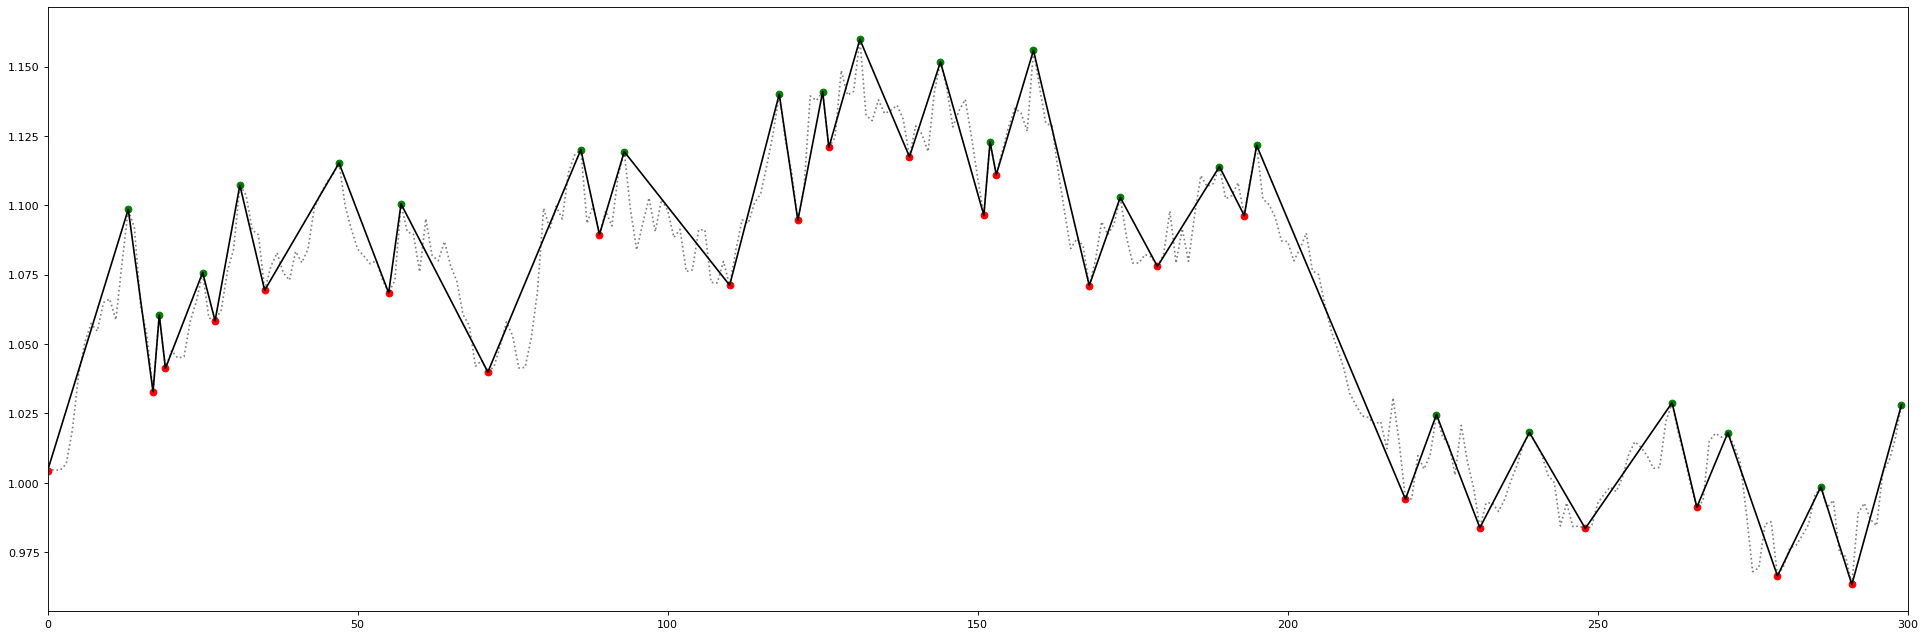

In [27]:
opt_zzb = ZigZagBuilder(*search_res)
opt_zz = opt_zzb.build_all(x_sr)
draw_chart(x_sr,opt_zz)

In [30]:
len_checker = Check_len_size(5)
chk_machine = Check_machine([check_no_same_move_direction, len_checker.check])

In [ ]:
search_res2 = Search_by_range(x_sr,np.arange(-0.4, 0.4, 0.03),np.arange(-0.4, 0, 0.03),check_func=chk_machine.check_is_correct)
search_res2

In [ ]:
opt_zz2 = ZigZagBuilder(*search_res2).build_all(x_sr)
draw_chart(x_sr,opt_zz2)

In [52]:
idx_df = pd.DataFrame(opt_zz[opt_zz[FLAG_COL_NAME]!=0].index,columns=["idx"])
idx_df["next_idx"] = idx_df["idx"].shift(-1)
idx_df["move"] = idx_df["next_idx"] - idx_df["idx"]
idx_df[idx_df["move"] < 2]["move"].any()

True

In [53]:
pd.DataFrame([1,0,0,-1,0,0,0,0,1],columns=[FLAG_COL_NAME])

,Flag
0,1
1,0
2,0
3,-1
4,0
5,0
6,0
7,0
8,1
